In [1]:
###-----------------
### Import libraries
###-----------------
from pathlib import Path  # Import Path for file system path operations and management
import numpy as np  # Import NumPy for numerical computations and array operations
import pandas as pd  # Import Pandas for data manipulation and analysis with DataFrames
import matplotlib.pyplot as plt  # Import Matplotlib for creating static, interactive visualizations
import seaborn as sns  # Import Seaborn for statistical data visualization built on Matplotlib

from sklearn.model_selection import train_test_split  # Import function to split dataset into training and testing subsets
from sklearn.metrics import (accuracy_score, 
                             classification_report, 
                             confusion_matrix, 
                             ConfusionMatrixDisplay, 
                             f1_score)  # Import function to calculate various metric

In [32]:
###------------------
### Global Parameters
###------------------

# Directories
#inpDir = '../../input' 
# inpDir = Path('..') / '..' / 'input'
# # outDir = '../output'
# outDir = Path('..') / 'output'


RANDOM_STATE = 24 
np.random.seed(RANDOM_STATE) # Set Random Seed for reproducible  results

TEST_SIZE  = 0.2 # Size of test data

# Parameters for plotting
params = {'legend.fontsize': 'medium',
          'figure.figsize': (15, 6),
          'axes.labelsize': 'large',
          'axes.titlesize':'large',
          'xtick.labelsize':'medium',
          'ytick.labelsize':'medium'
         }

TEST_SIZE  = 0.2 # Size of test data

CMAP = plt.cm.coolwarm

plt.rcParams.update(params)

plt.style.use('seaborn-v0_8-darkgrid') # plt.style.use('ggplot')

In [7]:
#reading csv
df = pd.read_csv('breast_cancer_mod.csv')
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,0,0,1,1,0
1,0,1,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,1,...,1,0,1,0,1,1,0,1,1,0
3,0,1,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,1,1,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
565,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
566,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
567,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [6]:
#unique value for every columns
for col in df.columns:
    print(f'Col : {col} -- {df[col].unique()}')

Col : mean radius -- [0 1]
Col : mean texture -- [0 1]
Col : mean perimeter -- [0 1]
Col : mean area -- [0 1]
Col : mean smoothness -- [0 1]
Col : mean compactness -- [0 1]
Col : mean concavity -- [0 1]
Col : mean concave points -- [0 1]
Col : mean symmetry -- [0 1]
Col : mean fractal dimension -- [1 0]
Col : radius error -- [0 1]
Col : texture error -- [1 0]
Col : perimeter error -- [0 1]
Col : area error -- [0 1]
Col : smoothness error -- [1 0]
Col : compactness error -- [1 0]
Col : concavity error -- [1 0]
Col : concave points error -- [1 0]
Col : symmetry error -- [1 0]
Col : fractal dimension error -- [1 0]
Col : worst radius -- [0 1]
Col : worst texture -- [0 1]
Col : worst perimeter -- [0 1]
Col : worst area -- [0 1]
Col : worst smoothness -- [1 0]
Col : worst compactness -- [1 0]
Col : worst concavity -- [0 1]
Col : worst concave points -- [0 1]
Col : worst symmetry -- [1 0]
Col : worst fractal dimension -- [1 0]
Col : target -- [0 1]


Text(0.5, 0, 'target')

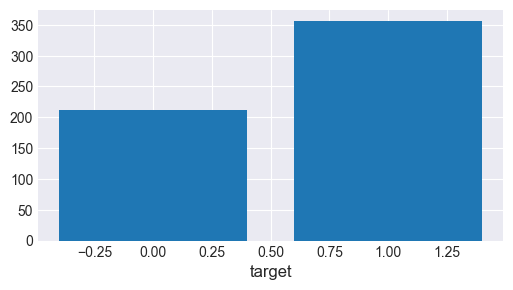

In [13]:
#plot
labels = ['Malignant','Benign']
fig,ax = plt.subplots(figsize = (6,3))
ax.bar(df['target'].value_counts().index,
    df['target'].value_counts().values)


In [14]:
df['target'].value_counts()

target
1    357
0    212
Name: count, dtype: int64

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,1,0,0,1,1
1,0,1,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,0,1,...,0,1,0,1,0,1,1,0,1,1
3,0,1,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,1
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
565,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
566,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
567,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


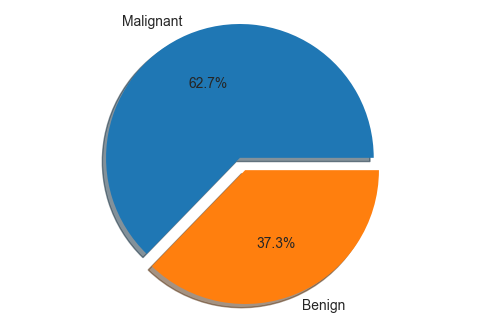

In [36]:
#pie chart
labels = ['Malignant','Benign']
fig , ax = plt.subplots(figsize = (6,4))
explode = (0,0.1)
ax.pie(df['target'].value_counts(),
      explode = explode,
      labels = labels,
      shadow = True,startangle = 0,autopct='%1.1f%%')
ax.axis('equal');
X

In [41]:
X = df.drop('target',axis = 1)
y = df['target']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=TEST_SIZE,stratify = y,random_state=RANDOM_STATE)

#summing
X_train['total'] = X_train.astype(np.int16).sum(axis = 1)

X_train['target'] = y_train

X_train.sort_values('total',inplace = True)
X_train.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,total,target
0,0,0,0,0,0,0,0,0,0,1,...,0,0,1,1,0,0,1,1,12,0
1,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,13,0
2,0,1,0,0,0,0,0,0,0,1,...,0,1,0,1,1,0,1,1,13,0
7,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,15,0
6,0,0,0,0,1,0,0,0,1,1,...,0,0,0,0,0,0,1,1,15,0


In [58]:
X_test['total'] = X_test.astype(np.int16).sum(axis = 1)

X_test['target'] = y_test

X_test.sort_values('total',inplace = True)
X_test.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,total,target
3,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,1,14,0
4,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,1,14,0
12,0,0,0,1,1,0,1,1,0,1,...,0,1,1,0,0,0,0,1,16,0
18,1,1,1,1,0,0,0,1,1,0,...,1,1,0,0,0,0,0,0,18,0
35,0,1,0,0,1,1,0,0,1,1,...,0,0,0,1,1,0,1,1,20,0


In [62]:
#checking accuracy
accuracy = {}
for b in range(X_train.shape[1]):
    X_train['pred'] = X_train['total'] >= b
    accuracy[b] = accuracy_score(X_train['target'],X_train['pred'])
best_b,accuracy

(27,
 {0: 0.6263736263736264,
  1: 0.6263736263736264,
  2: 0.6263736263736264,
  3: 0.6263736263736264,
  4: 0.6263736263736264,
  5: 0.6263736263736264,
  6: 0.6263736263736264,
  7: 0.6263736263736264,
  8: 0.6263736263736264,
  9: 0.6263736263736264,
  10: 0.6263736263736264,
  11: 0.6263736263736264,
  12: 0.6263736263736264,
  13: 0.6285714285714286,
  14: 0.6329670329670329,
  15: 0.6329670329670329,
  16: 0.6417582417582418,
  17: 0.6505494505494506,
  18: 0.6593406593406593,
  19: 0.6637362637362637,
  20: 0.6725274725274726,
  21: 0.6901098901098901,
  22: 0.7098901098901099,
  23: 0.734065934065934,
  24: 0.7692307692307693,
  25: 0.8021978021978022,
  26: 0.8307692307692308,
  27: 0.8505494505494505,
  28: 0.8483516483516483,
  29: 0.8241758241758241,
  30: 0.7472527472527473,
  31: 0.37362637362637363,
  32: 0.37362637362637363})

In [56]:
best_b = max(accuracy,key = accuracy.get)
accuracy[best_b]

0.8505494505494505

In [66]:
#testing accuracy for X test
X_test['pred'] = X_test['total'] >= best_b
accuracy_score(X_test['target'],X_test['pred'])

0.868421052631579